In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np 
import glob 
import warnings 
from scipy.stats import norm
from IPython.display import display, HTML
import scipy
import os
warnings.filterwarnings("ignore")
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
sns.set()

In [2]:
os.chdir(r'C:\Users\user\Desktop\Kaggle\Football stats analysis project\Data\UnderStat')
def loadData(path):
    allFiles = glob.glob(path)
    dfOut = pd.DataFrame()
    list_ = []
    for file_ in allFiles:
        df = pd.read_csv(file_,index_col=0, header=0)
        list_.append(df)
    dfOut = pd.concat(list_)
    return dfOut
df = loadData('Player_Stats_*.csv')

In [3]:
team_stats = loadData('Team_Stats_*.csv')

In [4]:
team_stats.rename(columns={'xGA':'xA'},inplace=True)
team_stats.head()

,team,matches,wins,draws,losses,goals_for,goals_against,points,xG,xA,xPTS,League
0,Bayern Munich,26,19,3,4,68,27,60,65.34-2.66,20.77-6.23,61.16+1.16,Bundesliga
1,Borussia Dortmund,26,18,6,2,64,30,60,49.84-14.16,30.45+0.45,48.83-11.17,Bundesliga
2,RasenBallsport Leipzig,26,14,7,5,44,20,49,50.26+6.26,28.53+8.53,48.62-0.38,Bundesliga
3,Borussia M.Gladbach,26,14,5,7,45,31,47,42.70-2.30,38.66+7.66,41.25-5.75,Bundesliga
4,Eintracht Frankfurt,26,13,7,6,51,30,46,48.87-2.13,35.18+5.18,43.31-2.69,Bundesliga


In [5]:
df = df.fillna(0)
df = df[df.Name != 0]

In [7]:
def getCleandata(df):
    columns = df.keys()
    df['xG'] = df['xG'].apply(lambda x: x[:x.find('+')] if x.find('+') > 0 else x[:x.find('-')])
    df['xA'] = df['xA'].apply(lambda x: x[:x.find('+')] if x.find('+') > 0 else x[:x.find('-')])
#     df['Position'] = df['Position'].apply(lambda x: x.replace(' ',''))
    for column in columns:
        df[column] = pd.to_numeric(df[column],errors='ignore')
    return df
df_clean = getCleandata(df)

In [34]:
team_stats = getCleandata(team_stats)

In [68]:
# df_clean.sort_values(by='Goals_Scored',ascending = False)

In [34]:
df[df.Goals_Scored ==  3]

,Name,Position,Apps,Min,Goals_Scored,Assists,Sh90,KP90,xG,xA,xG90,xA90,Team
3,Ismael Traoré,D,22.00,1916.00,3,1,0.47,0.09,3.33,0.14,0.16,0.01,Angers
4,Nathan Aké,D,31.00,2784.00,3,0,0.65,0.06,3.83,0.07,0.12,0.00,Bournemouth
4,James Tarkowski,D,28.00,2456.00,3,0,0.70,0.11,3.57,0.10,0.13,0.00,Burnley
3,Néstor Araújo,D,25.00,2052.00,3,0,0.39,0.13,0.92,0.51,0.04,0.02,Celta_Vigo
2,Mario Hermoso,D,22.00,1917.00,3,0,0.94,0.00,1.64,0.00,0.08,0.00,Espanyol
0,Zanka,D,24.00,2151.00,3,1,0.33,0.33,1.48,0.39,0.06,0.02,Huddersfield
5,Francesco Acerbi,D,26.00,2321.00,3,1,0.50,0.23,3.22,0.64,0.12,0.02,Lazio
3,Harry Maguire,D,26.00,2149.00,3,0,1.17,0.42,1.83,0.65,0.08,0.03,Leicester
5,Virgil van Dijk,D,31.00,2758.00,3,1,0.85,0.20,2.85,1.24,0.09,0.04,Liverpool
5,Loïck Landre,D,22.00,1589.00,3,0,0.40,0.00,1.41,0.00,0.08,0.00,Nimes


# Data Exploration

Text(5, 3.2, 'Shane Duffy (Brighton)')

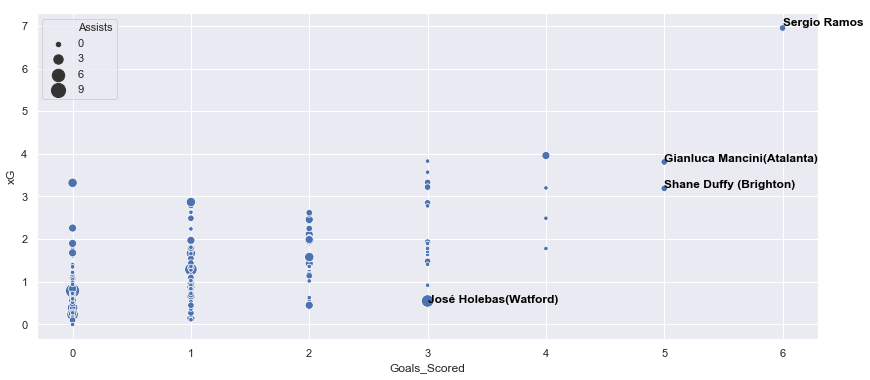

In [35]:
df = df_clean[(df_clean.Apps > 20) & (df_clean.Position == 'D')]
plt.figure(figsize=(14,6))
p1 = sns.scatterplot(data=df ,x='Goals_Scored',y='xG',size ='Assists',sizes=(20, 200))
p1.text(6, 7, "Sergio Ramos", horizontalalignment='left', size='medium', color='black', weight='semibold')
p1.text(3, 0.5, "José Holebas(Watford)", horizontalalignment='left', size='medium', color='black', weight='semibold')
p1.text(5, 3.8, "Gianluca Mancini(Atalanta)", horizontalalignment='left', size='medium', color='black', weight='semibold')
p1.text(5, 3.2, "Shane Duffy (Brighton)", horizontalalignment='left', size='medium', color='black', weight='semibold')

In [66]:
df

,Name,Position,Apps,Min,Goals_Scored,Assists,Sh90,KP90,xG,xA,xG90,xA90,Team
0,Romelu Lukaku,F,27.00,1768.00,12,0,2.55,0.87,12.00,1.00,0.61,0.09,Manchester_United
1,Paul Pogba,M,27.00,2293.00,11,9,3.41,1.57,13.00,4.00,0.52,0.16,Manchester_United
2,Anthony Martial,FM,21.00,1309.00,9,2,2.06,2.06,5.00,3.00,0.38,0.21,Manchester_United
3,Marcus Rashford,FM,26.00,1820.00,9,6,3.21,1.34,9.00,4.00,0.47,0.21,Manchester_United
4,Jesse Lingard,FM,22.00,1297.00,4,2,1.73,0.90,4.00,2.00,0.29,0.16,Manchester_United
7,Ashley Young,D,23.00,2016.00,2,2,0.45,1.43,0.00,3.00,0.02,0.14,Manchester_United
10,Nemanja Matic,DM,24.00,2125.00,1,0,0.42,0.55,1.00,0.00,0.07,0.02,Manchester_United
12,Luke Shaw,DM,24.00,2144.00,1,2,0.71,1.13,1.00,3.00,0.05,0.13,Manchester_United
13,Victor Lindelöf,D,25.00,2159.00,1,1,0.29,0.21,0.00,1.00,0.03,0.07,Manchester_United
15,David de Gea,GK,30.00,2700.00,0,0,0.00,0.00,0.00,0.00,0.00,0.00,Manchester_United
